### Titantic Dataset

1. Process the data with LabelEncoder to transform text values to numeric ones
2. Split the columns into X features and Y labels
3. Test train split
4. Classify using a Classification Algorithm
5. Create predictions for all test values
6. Evaluate Model Performance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Titanic-Survival-Dataset.csv')
dataset.shape

(887, 8)

In [ ]:
dataset.head()

,Survived,Name,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,Mr. Owen Harris Braund,3,male,22.0,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,female,38.0,1,0,71.2833
2,1,Miss. Laina Heikkinen,3,female,26.0,0,0,7.9250
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,female,35.0,1,0,53.1000
4,0,Mr. William Henry Allen,3,male,35.0,0,0,8.0500


In [ ]:
del dataset['Name']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Sex'] = le.fit_transform(dataset['Sex'])

In [ ]:
dataset.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.645998,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
# normalisation

dataset['Age'] = (dataset['Age'] - dataset['Age'].min()) / (dataset['Age'].max() - dataset['Age'].min())
dataset['Fare'] = (dataset['Fare'] - dataset['Fare'].min()) / (dataset['Fare'].max() - dataset['Fare'].min())

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,0.271174,1,0,0.014151
1,1,1,0,0.472229,1,0,0.139136
2,1,3,0,0.321438,0,0,0.015469
3,1,1,0,0.434531,1,0,0.103644
4,0,3,1,0.434531,0,0,0.015713


In [ ]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(709, 6)
(178, 6)


#### Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

In [ ]:
index = ["Did Not Survive", "Survived"]

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df = df.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")

df['Result'] = index
df = df.set_index(keys=df['Result'])
df.drop('Result', 1, inplace=True)
df

,Actual,Predicted,Count
Result,,,
Did Not Survive,0,0,117
Survived,1,0,61


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Dummy Accuracy: ', accuracy_score(y_test, y_pred))
print('Dummy Precision:', precision_score(y_test, y_pred, zero_division=1))
print('Dummy Recall:   ', recall_score(y_test, y_pred))
print('Dummy F1:       ', f1_score(y_test, y_pred))
print('Dummy Kappa:    ', cohen_kappa_score(y_test, y_pred));

Dummy Accuracy:  0.6573033707865169
Dummy Precision: 1.0
Dimmy Recall:    0.0
Dummy F1:        0.0
Dummy Kappa:     0.0


In [ ]:
# Manual Accuracy Count

117/(117+61)

0.6573033707865169

#### Decision Trees & Performance Metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = DF.predict(X_test)

In [ ]:
index = ["True Negatives", "False Positives", "False Negatives", "True Positives"]

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_copy = df
df = df.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")

df['Result'] = index
df = df.set_index(keys=df['Result'])
df.drop('Result', 1, inplace=True)
df

,Actual,Predicted,Count
Result,,,
True Negatives,0,0,93
False Positives,0,1,24
False Negatives,1,0,16
True Positives,1,1,45


In [ ]:
TN = df['Count'][0]
TP = df['Count'][3]
FP = df['Count'][1]
FN = df['Count'][2]

In [ ]:
accuracy = (TP + TN) / (TP + FP + TN + FP)
accuracy

0.7419354838709677

In [ ]:
precision = TP / (FP + TP)
precision

0.6521739130434783

In [ ]:
recall = TP /  (FN + TP)
recall

0.7377049180327869

In [ ]:
F1 = 2 * precision * recall / (precision + recall)
F1

0.6923076923076924

In [ ]:
print('DT Accuracy: ', accuracy_score(y_test, y_pred))
print('DT Precision:', precision_score(y_test, y_pred))
print('DT Recall:   ', recall_score(y_test, y_pred))
print('DT F1:       ', f1_score(y_test, y_pred))
print('DT Kappa:    ', cohen_kappa_score(y_test, y_pred))

DT Accuracy:  0.7752808988764045
DT Precision: 0.6521739130434783
DT Recall:    0.7377049180327869
DT F1:        0.6923076923076924
DT Kappa:     0.516370058415976


In [ ]:
# confusion matrix plot
def visualize_classification(y_test, y_pred):
    """
    Visualizes the classification performance by displaying a classification report
    and a confusion matrix heatmap.
    """
    # Generate and print the classification report
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    # Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred.round())

    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

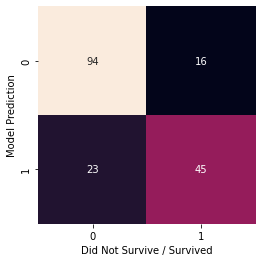

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Did Not Survive / Survived')
plt.ylabel('Model Prediction');

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print('RF Accuracy: ', accuracy_score(y_test, y_pred))
print('RF Precision:', precision_score(y_test, y_pred))
print('RF Recall:   ', recall_score(y_test, y_pred))
print('RF F1:       ', f1_score(y_test, y_pred))
print('RF Kappa:    ', cohen_kappa_score(y_test, y_pred))

RF Accuracy:  0.8089887640449438
RF Precision: 0.7288135593220338
RF Recall:    0.7049180327868853
RF F1:        0.7166666666666666
RF Kappa:     0.5726592289224686
